## Fitting Bayesiano

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt 
%matplotlib inline 
#per visualizzare i grafici in jupyter

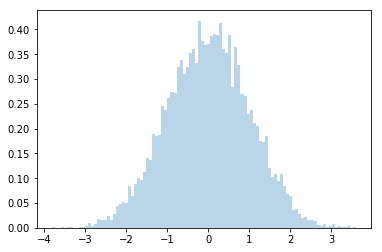

In [13]:
#generare una gaussiana
n=10000
def gauss_gen(n,mu,sigma):
    sample = np.array([np.mean(10*np.random.random_sample(size=10)) for i in np.arange(n)])
    return (sample -np.mean(sample))*sigma/np.std(sample)+mu

sample = gauss_gen(n,0,1)
plt.hist(sample, bins=100, density=True, alpha=0.3, label='mygen')
popt=st.norm.fit(sample)

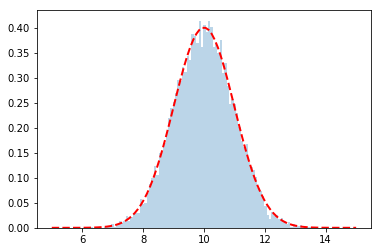

(0.9998515248298645, 0.7905300855636597)


In [21]:
sample = st.norm.rvs(size=n, loc=10, scale=1)
plt.hist(sample, bins=100,density=True, alpha=0.3, label='stat')
#density = True l'area è normalizzata ad 1!! serve per confrontare con una qualsiasi pdf
popt = st.norm.fit(sample)
x = np.linspace(5,15,100)
y = st.norm.pdf(x, *popt)
# the * before a vector insert all the values separated by a , as arguments of a function
plt.plot(x,y,'r--', linewidth=2)
plt.show()
print(st.shapiro(sample))

#Il metodo .ft dovrebbe essere un metodo di massimizzazione della likelyhood

In [22]:
#Generiamo un campione e la corrispondente likelyhood
n=5
sample = st.norm.rvs(size=n)

def LH(sample, dist, args=()):
    return np.prod(dist(sample,*args))

f = st.norm.pdf
x = np.linspace(-4,4,100)
y=f(x)

#----------------


In [ ]:
def log_LH(sample,dist,args=()):
    return np.sum(np.log(dist(sample,*args)))

like 

In [23]:
def datagen(x,eps):
    return np.sin(2*np.pi*x)+\
            st.norm.rvs(size = len(x), loc=0,scale=eps)

def sq_err_ridge(x,y,f, lamb= 0,p=()):
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
    from scipy.optimize import minimize 
    #Minimize requires a function and the vector of its arguments
    #I implement the cost function for a generic function f:
    def cost(args):
        #Insertion of the Ridge penalization
        return np.sum((y-f(x,args))**2)*0.5 + lamb*np.sum(args**2)*0.5
    return minimize(cost,p)
    #returns an OptimizeResult object. Whose attribute x contains the solutions

def sq_err(x,y,f,p=()):
    from scipy.optimize import minimize
    def cost(args):#i parametri vanno passati tutti insieme come un unico vettore
        return np.sum((y-f(x,args))**2)*0.5
    return minimize(cost,p) #restituisce un oggetto con vari attributi tra cui i valori dei parametri ottimizzati
    
    
#Need to define my polynomial function this way in to use minimize
def my_poly(x, args=()): #args has to be a tuple
    f = np.poly1d(args)
    return f(x)

In [36]:
def log_LH_GaussNoise(x,y,f,beta=1, args=()):
    yexp=f(x,args)
    return -beta*0.5*np.sum((yexp-y)**2)+len(x)*np.log(beta)*0.5-N*0,5*np.log(2*np.pi)

def min_neglog_LH_GaussNoise(x,y,f,p=[1,()]):
    from scipy.optimize import minimize
    def neg_log_LH_GaussNoise(args):
        beta = args[0]
        w = args[1:]
        yexp = f(x,w)
        N = len(x)
        ll = -beta*0.5*np.sum((yexp-y)**2)+len(x)*np.log(beta)*0.5-N*0,5*np.log(2*np.pi)
        return -ll
    #Sono i bpundaries sui valori di tutti i parametri 
    bnds = np.array([(0,None)] + [(None,None)]*len(p[1:]))
    return minimize(neg_log_LH_GaussNoise, p, method='SLSQP', bounds=bnds)


#Funzione alternativa che potrebbe funzionare
def f(x, args=[1,2*np.pi]):
    a,b = args[0], args[1]
    return a *np.sin(b*x)

f = my_poly
x = np.linspace(0,1,20)
eps = 0.1
y = datagen(x, eps)

res = min_neglog_LH_GaussNoise(x, y, f, p=[0.4, 0.01, 0.2, 0.1, 0.1]).x
print('eps=sqrt(1/beta)=', np.round(np.sqrt(1/res[0]),2)), ' , p=', np.round(res[1:],3)



TypeError: bad operand type for unary -: 'tuple'

In [ ]:
pymc tutorial:

In [37]:
https://docs.pymc.io/notebook/GP-Marginal.html

SyntaxError: invalid syntax (<ipython-input-37-2f45ae7d2779>, line 1)